# GraphConvNets

In [1]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../data generation')
sys.path.insert(0,'../model architecture')

In [2]:
from data_generator import load_dataset
from models import *
from experiment_tools import *
from params import *

Using backend: pytorch


## Dataset
### Set hyper-parameters: dataset

In [3]:
test_cases, dataset_size, std_scaler, test_type = get_test_params()

### Select a dataset

In [4]:
idx = 0
test_case = test_cases[idx]
test_case

'pglib_opf_case24_ieee_rts.m'

### Load a dataset

In [5]:
dataset = load_dataset(test_case=test_case,
                       dataset_size=dataset_size,
                       std_scaler=std_scaler,
                       test_type=test_type,
                       gen_only=True)

### Check the shape of the dataset
- number of samples
- number of buses
- number of generators

In [6]:
# (num_samples, num_buses),(num_samples, num_gens) 
dataset['x'].shape, dataset['y'].shape 

((30000, 24, 1), (30000, 24, 6))

### Check the shape of the graph

In [7]:
g = get_graph_structure(dataset['g'])

In [8]:
dataset['g'].keys()

dict_keys(['bus_idx', 'fbus2tbus', 'gen_bus_idx'])

In [9]:
dataset['g']['bus_idx'].shape, dataset['g']['fbus2tbus'].shape, dataset['g']['gen_bus_idx'].shape

((24,), (38, 2), (33, 1))

In [10]:
g

Graph(num_nodes=24, num_edges=100,
      ndata_schemes={}
      edata_schemes={})

In [11]:
# import networkx as nx
# import matplotlib.pyplot as plt

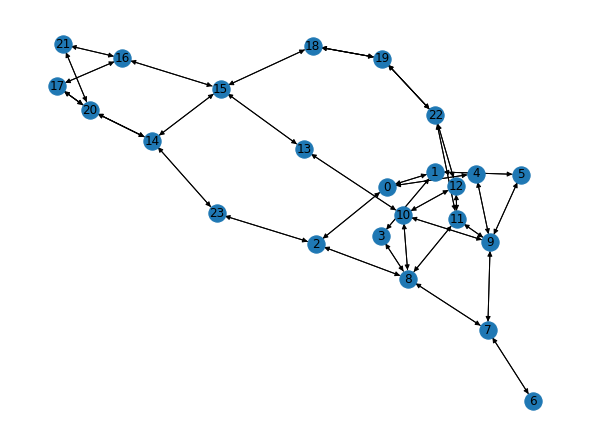

In [12]:
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

## Model
### Set hyper-parameters: model

In [13]:
model_name = "gcn"
num_epochs, batch_size, lr, threshold, print_step = get_h_params(model_name)

### Set data-loaders

In [14]:
train_loader, val_loader, test_loader = data_prep(dataset=dataset,
                                                  batch_size=None)

/Users/jeehyunpark/git_local/UT/Project_EE394V_SPR2021/code/experiments/experiment_tools.py:42: RuntimeWarning: invalid value encountered in true_divide
  x_normed = np.nan_to_num(dataset["x"] / dataset["x"].max(axis=0), nan=0.0)


### Check the shape of the data-loaders
- number of batch
- number of buses
- number of generators

In [15]:
feature, label = next(iter(train_loader))
feature.shape, label.shape

(torch.Size([24, 1]), torch.Size([24, 6]))

In [16]:
feature, label = next(iter(val_loader))
feature.shape, label.shape

(torch.Size([24, 1]), torch.Size([24, 6]))

In [17]:
feature, label = next(iter(test_loader))
feature.shape, label.shape

(torch.Size([24, 1]), torch.Size([24, 6]))

### Set a model

In [18]:
# gcn = GraphConvNet(in_feats=feature.shape[1], out_feats=label.shape[1]) # num_bus / num_gen

gcn = GCN(g=g,
          in_feats=feature.shape[1],
          n_hidden=64,
          n_classes=label.shape[1],
          n_layers=3,
          activation=F.relu,
          dropout=0)

# loss object
# loss_func = nn.BCEWithLogitsLoss()
loss_func = nn.MSELoss()

# optim
optimizer = optim.Adam(gcn.parameters(), lr=lr)

gcn.eval()

GCN(
  (layers): ModuleList(
    (0): GraphConv(in=1, out=64, normalization=both, activation=<function relu at 0x7f8a390ff050>)
    (1): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f8a390ff050>)
    (2): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f8a390ff050>)
    (3): GraphConv(in=64, out=6, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0, inplace=False)
  (tanh): Tanh()
)

### Train the model

In [19]:
train_history, val_history = train(net=gcn,
      train_loader=train_loader,
      val_loader=val_loader,
      optimizer=optimizer,
      loss_func=loss_func,
      model_name=model_name,
      dataset_name=test_case,
      num_epochs=num_epochs,
      print_step=print_step)

> case: pglib_opf_case24_ieee_rts
> model: gcn
- num of params: 8838
- training
	[epoch: 1, iter:  1000]	loss: 0.17896	val loss: 0.17587
	[epoch: 1, iter:  2000]	loss: 0.17396	val loss: 0.17255
	[epoch: 1, iter:  3000]	loss: 0.17178	val loss: 0.17177
	[epoch: 1, iter:  4000]	loss: 0.17104	val loss: 0.16935
	[epoch: 1, iter:  5000]	loss: 0.16959	val loss: 0.16907
	[epoch: 1, iter:  6000]	loss: 0.16913	val loss: 0.16744
	[epoch: 1, iter:  7000]	loss: 0.16758	val loss: 0.16622
	[epoch: 1, iter:  8000]	loss: 0.16709	val loss: 0.16537
	[epoch: 1, iter:  9000]	loss: 0.16548	val loss: 0.16489
	[epoch: 1, iter: 10000]	loss: 0.16383	val loss: 0.16661
	[epoch: 1, iter: 11000]	loss: 0.16155	val loss: 0.15819
	[epoch: 1, iter: 12000]	loss: 0.15967	val loss: 0.15840
	[epoch: 1, iter: 13000]	loss: 0.15589	val loss: 0.15304
	[epoch: 1, iter: 14000]	loss: 0.15121	val loss: 0.15217
	[epoch: 1, iter: 15000]	loss: 0.14914	val loss: 0.14557
	[epoch: 1, iter: 16000]	loss: 0.14558	val loss: 0.14810
	[epoch:

	[epoch: 7, iter: 10000]	loss: 0.04391	val loss: 0.04322
	[epoch: 7, iter: 11000]	loss: 0.04427	val loss: 0.04540
	[epoch: 7, iter: 12000]	loss: 0.04321	val loss: 0.04215
	[epoch: 7, iter: 13000]	loss: 0.04318	val loss: 0.04132
	[epoch: 7, iter: 14000]	loss: 0.04333	val loss: 0.04355
	[epoch: 7, iter: 15000]	loss: 0.04347	val loss: 0.04170
	[epoch: 7, iter: 16000]	loss: 0.04295	val loss: 0.04607
	[epoch: 7, iter: 17000]	loss: 0.04331	val loss: 0.04396
	[epoch: 7, iter: 18000]	loss: 0.04242	val loss: 0.04062
	[epoch: 7, iter: 19000]	loss: 0.04308	val loss: 0.04052
	[epoch: 7, iter: 20000]	loss: 0.04324	val loss: 0.04174
	[epoch: 7, iter: 21000]	loss: 0.04205	val loss: 0.04109
	- validation loss decreased (0.04459->0.04109): the best model was updated.
	[epoch: 8, iter:  1000]	loss: 0.04133	val loss: 0.04201
	[epoch: 8, iter:  2000]	loss: 0.04237	val loss: 0.03961
	[epoch: 8, iter:  3000]	loss: 0.04208	val loss: 0.03929
	[epoch: 8, iter:  4000]	loss: 0.04154	val loss: 0.04050
	[epoch: 8,

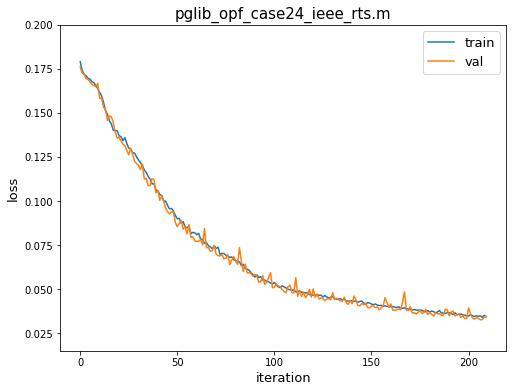

In [23]:
plt.plot(train_history, label="train")
plt.plot(val_history, label="val")
plt.title(test_case, fontsize=15)
plt.xlabel("iteration", fontsize=13)
plt.ylabel("loss", fontsize=13)
plt.ylim(0.015, 0.2)
plt.legend(fontsize=13)
plt.show()

### Test the model

In [21]:
def test(net, test_loader, model_name, dataset_name, threshold=0.4):
    print("- testing")

    # load the best model
    load_model(net, model_name, dataset_name)

    accuracy = []
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            preds = net(inputs)
            
            for i in range(preds.shape[0]):
                for j in range(preds.shape[1]):
                    if preds[i][j] > threshold:
                        preds[i][j] = 1
                    elif preds[i][j] < threshold:
                        preds[i][j] = -1
                    else:
                        preds[i][j] = 0
            

            correct = (preds == labels).sum().item()
            total = labels.shape[0]

            acc = correct / total
            accuracy.append(acc)

    print("\taccuracy: {:.4f}%".format(mean(accuracy) * 100))

In [22]:
test(net=gcn,
     test_loader=test_loader,
     model_name="gcn",
     dataset_name=test_case,
     threshold=0.001)

- testing
	accuracy: 111.6947%
